Simple model for Fraud Detection

In [0]:
import numpy as np 
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random

In [4]:
df = pd.read_csv("creditcard.csv",low_memory= False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,52834.0,-0.677020,1.177924,1.740986,3.598803,-0.307167,0.477159,-0.212999,0.611417,-1.287445,0.441713,-0.567045,0.237730,0.242009,0.207043,0.356728,-1.178512,1.275059,-0.600549,1.342476,0.113204,0.153258,0.547358,-0.046115,0.458825,-0.396966,0.374871,0.084324,0.057964,9.73,0
1,164222.0,-1.202833,1.065527,1.454517,-0.887965,0.348124,0.690149,0.271819,0.339469,0.408776,-0.115835,0.133491,0.090404,-0.663506,-0.002995,0.187201,0.344801,-0.848217,0.810253,0.936181,0.216338,-0.233371,-0.620246,-0.258368,0.028282,0.451284,-0.430217,0.144723,0.187978,7.98,0
2,127.0,1.356489,-0.221355,-1.236996,-1.246835,1.907809,3.103911,-0.603384,0.762841,0.118339,-0.129794,0.009452,0.040664,0.063020,0.375077,1.322872,0.581876,-0.803960,-0.054106,0.443846,0.052997,-0.163829,-0.602688,0.011113,1.063845,0.400726,0.975862,-0.081220,-0.003314,1.54,0
3,81607.0,1.230681,0.681658,0.529049,2.358968,0.147218,-0.232780,0.191221,-0.152884,-0.874954,0.654975,-0.770957,0.383908,1.339417,0.007632,0.444245,0.805502,-0.892181,-0.289254,-0.825635,-0.064285,-0.093380,-0.244346,-0.050984,-0.109101,0.529819,-0.046514,-0.000929,0.021528,0.79,0
4,141547.0,-3.027658,2.630481,-0.855729,-3.051705,-0.237334,-1.402803,1.045721,-0.569462,2.081598,4.904614,-0.593765,-0.771698,-0.059907,-1.837139,-1.068400,0.244181,-0.310941,-2.118674,-0.211051,1.956424,-0.555012,0.110404,0.004927,-0.082790,-0.062591,-0.646698,0.546113,-0.409275,0.99,0


Exploring data

In [6]:
fraud = df.loc[df['Class']==1] # 1 represent frauds
non_frauds = df.loc[df['Class']==0] # 0 represent no frauds
print(len(fraud))
print(len(non_frauds))


492
284315


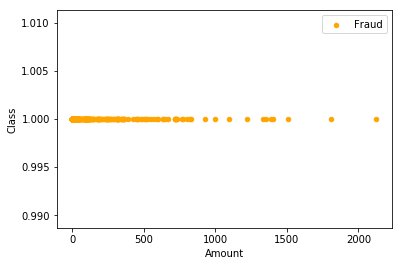

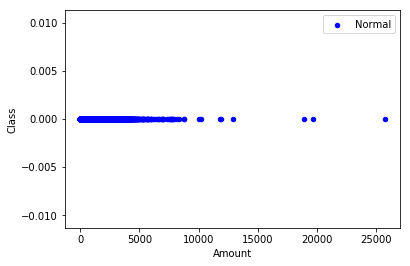

In [9]:
ax = fraud.plot.scatter(x= "Amount",y= "Class", color="Orange",label ="Fraud")
non_frauds.plot.scatter(x="Amount", y= "Class", color="Blue", label ="Normal")
plt.show()

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [0]:
x = df.iloc[:,:-1] # exclude the last column
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.35)

In [12]:
logistic = linear_model.LogisticRegression(C= 1e5)
logistic.fit(X_train, y_train)
print("Score:", logistic.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.9986858340940782


In [13]:
y_predicted = np.array(logistic.predict(X_test))
print(y_predicted)

[0 0 0 ... 0 0 0]
